In [2]:
import pandas as pd
import numpy as np
import INS_Analysis as insd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
generator_path = '../data/'
spectrums = generator_path+'spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y']
detector_spectrums = spectrums

soil_fluxes = generator_path+'soil_fluxes.npz'
soil_fluxes = np.load(soil_fluxes)
soil_fluxes = soil_fluxes['y']



In [4]:
bins

array([0.00000e+00, 1.00000e-05, 9.04482e-03, 1.80796e-02, 2.71145e-02,
       3.61493e-02, 4.51841e-02, 5.42189e-02, 6.32538e-02, 7.22886e-02,
       8.13234e-02, 9.03582e-02, 9.93931e-02, 1.08428e-01, 1.17463e-01,
       1.26498e-01, 1.35532e-01, 1.44567e-01, 1.53602e-01, 1.62637e-01,
       1.71672e-01, 1.80706e-01, 1.89741e-01, 1.98776e-01, 2.07811e-01,
       2.16846e-01, 2.25881e-01, 2.34915e-01, 2.43950e-01, 2.52985e-01,
       2.62020e-01, 2.71055e-01, 2.80090e-01, 2.89124e-01, 2.98159e-01,
       3.07194e-01, 3.16229e-01, 3.25264e-01, 3.34298e-01, 3.43333e-01,
       3.52368e-01, 3.61403e-01, 3.70438e-01, 3.79473e-01, 3.88507e-01,
       3.97542e-01, 4.06577e-01, 4.15612e-01, 4.24647e-01, 4.33682e-01,
       4.42716e-01, 4.51751e-01, 4.60786e-01, 4.69821e-01, 4.78856e-01,
       4.87890e-01, 4.96925e-01, 5.05960e-01, 5.14995e-01, 5.24030e-01,
       5.33065e-01, 5.42099e-01, 5.51134e-01, 5.60169e-01, 5.69204e-01,
       5.78239e-01, 5.87274e-01, 5.96308e-01, 6.05343e-01, 6.143

In [7]:
filenames_path = '../filenames.csv'
filenames = pd.read_csv(filenames_path)['name']

In [8]:
# make dataframe
df = pd.DataFrame()
df['filename'] = filenames
df['detector'] = detector_spectrums[:, 0].tolist()
df['gebless'] = soil_fluxes[:, 0].tolist()

In [17]:
def plott(spectrums, suptitle):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(suptitle)
    c_center = 4.44
    c_width = 0.15
    c_window = [c_center - c_width, c_center + c_width]
    c_maxs = []
    c_mins = []
    for i in range(len(spectrums)):
        axs[0, 1].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        filter = (bins > c_window[0]) & (bins < c_window[1])
        # print first and last bin index in the window
        print(np.where(filter)[0][0], np.where(filter)[0][-1])
        c_maxs.append(np.max(spectrums[i][0][(bins > c_window[0]) & (bins < c_window[1])]))
        c_mins.append(np.min(spectrums[i][0][(bins > c_window[0]) & (bins < c_window[1])]))
        # draw stem plots for spectrum
    axs[0, 1].legend()
    axs[0, 1].set_title('Carbon Window (Zoomed)')
    axs[0, 1].set_xlabel('MeV')
    axs[0, 1].set_ylabel('Intensity')
    axs[0, 1].set_xlim(c_center - c_width, c_center + c_width)
    axs[0, 1].set_ylim(np.min(c_mins), np.max(c_maxs))

    # Third subplot
    si_center = 1.78
    si_width = 0.15
    si_window = [si_center - si_width, si_center + si_width]
    si_maxs = []
    si_mins = []
    for i in range(len(spectrums)):
        axs[1, 0].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        filter = (bins > si_window[0]) & (bins < si_window[1])
        # print first and last bin index in the window
        print(np.where(filter)[0][0], np.where(filter)[0][-1])
        si_maxs.append(np.max(spectrums[i][0][(bins > si_window[0]) & (bins < si_window[1])]))
        si_mins.append(np.min(spectrums[i][0][(bins > si_window[0]) & (bins < si_window[1])]))
    axs[1, 0].legend()
    axs[1, 0].set_title('Silicone Window (Zoomed)')
    axs[1, 0].set_xlabel('MeV')
    axs[1, 0].set_ylabel('Intensity')
    axs[1, 0].set_xlim(si_center - si_width, si_center + si_width)
    axs[1, 0].set_ylim(np.min(si_mins), np.max(si_maxs))

    # Fourth subplot
    low_window = [0.1, 1]
    low_maxs = []
    low_mins = []
    for i in range(len(spectrums)):
        axs[1, 1].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        low_maxs.append(np.max(spectrums[i][0][(bins > low_window[0]) & (bins < low_window[1])]))
        low_mins.append(np.min(spectrums[i][0][(bins > low_window[0]) & (bins < low_window[1])]))
    axs[1, 1].legend()
    axs[1, 1].set_title('Low Energy (Zoomed)')
    axs[1, 1].set_xlabel('MeV')
    axs[1, 1].set_ylabel('Intensity')
    axs[1, 1].set_xlim(low_window[0], low_window[1])
    axs[1, 1].set_ylim(np.min(low_mins), np.max(low_maxs))

    # First subplot
    for i in range(len(spectrums)):
        axs[0, 0].plot(bins, spectrums[i][0], label=filenames[i])
    axs[0, 0].legend()
    axs[0, 0].set_title('Spectrums')
    axs[0, 0].set_xlabel('MeV')
    axs[0, 0].set_ylabel('Intensity')
    # draw squares around the zoomed regions
    for ax in axs:
        for a in ax:
            a.add_patch(plt.Rectangle((0.1, np.min(low_mins)), 0.9, np.max(low_maxs), fill=None, edgecolor='red'))
            a.add_patch(plt.Rectangle((si_center - si_width, np.min(si_mins)), si_width*2, np.max(si_maxs), fill=None, edgecolor='red'))
            a.add_patch(plt.Rectangle((c_center - c_width, np.min(c_mins)), c_width*2, np.max(c_maxs), fill=None, edgecolor='red'))
    # label the zoomed regions
    axs[0, 0].text((low_window[0]+low_window[1])/2, np.max(low_maxs), 'Low Energy', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')
    axs[0, 0].text(c_center, np.max(c_maxs), 'Carbon', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')
    axs[0, 0].text(si_center, np.max(si_maxs), 'Silicone', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')

    # log_toggle = [True, True, True, True]
    log_toggle = [False, False, False, False]

    for i in range(log_toggle.__len__()):
        if log_toggle[i]:
            axs[i//2, i%2].set_yscale('log')

    # log scale
    plt.tight_layout()
    plt.show()


476 509
476 509
476 509
476 509
182 214
182 214
182 214
182 214


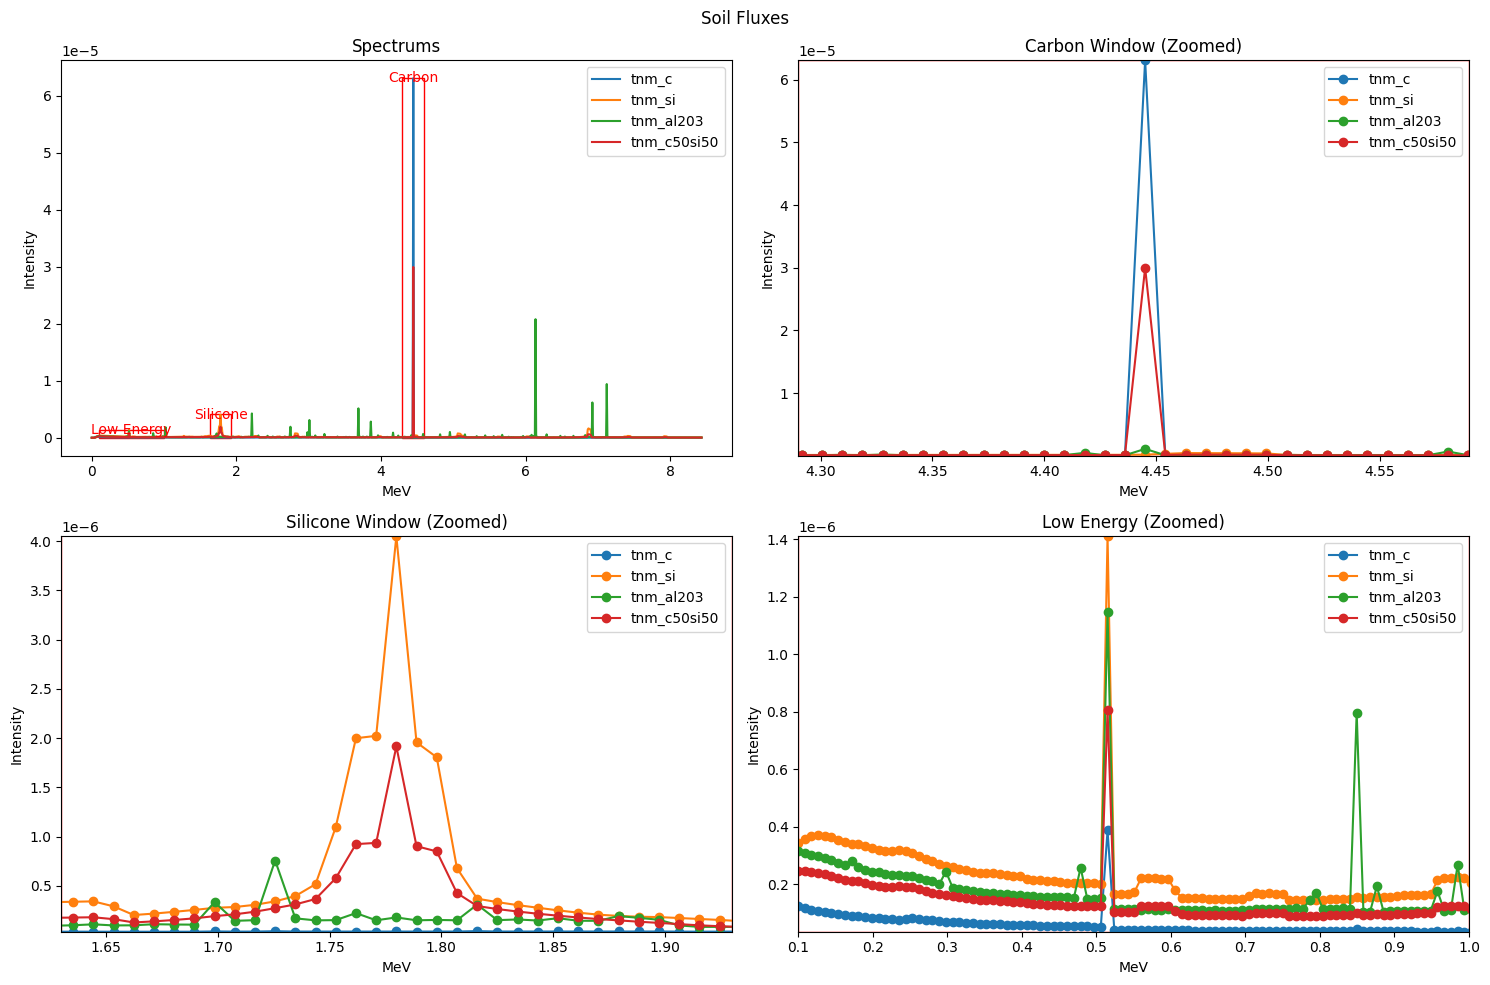

In [18]:
plott(soil_fluxes, 'Soil Fluxes')